In [38]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler


In [39]:
# Cargar el dataset limpio
data = pd.read_csv('data_resampled.csv')
data.head()

,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Mother's qualification: Basic education 3rd cycle,Mother's qualification: Basic education 1st cycle,Mother's qualification: Basic Education 2nd Cycle,Father's qualification: Others,Father's qualification: Secondary education,Father's qualification: Higher education,Father's qualification: Basic education 3rd cycle,Father's qualification: Basic education 1st cycle,Father's qualification: Basic Education 2nd Cycle,Target
0,5,1,122.0,127.3,1,0,1,1,0,20,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,160.0,142.5,1,0,0,1,0,19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,5,1,122.0,124.8,1,0,0,1,0,19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,2,1,122.0,119.6,1,0,1,0,0,20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,1,0,100.0,141.5,0,0,1,0,0,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


Combertimos la columna Target a binaria


In [ ]:
# Transformar la variable Target a binaria.Los 0s, antes dropout, pasa a ser 1 y el resto 0.
data['Target'] = data['Target'].apply(lambda x: 1 if x == 0 else 0)
# Imprimir la columna Target para verificar la transformación.
print(data['Target'])
print(data['Target'].value_counts())



0       1
1       0
2       1
3       0
4       0
       ..
6695    0
6696    0
6697    0
6698    0
6699    0
Name: Target, Length: 6700, dtype: int64
Target
0    4500
1    2200
Name: count, dtype: int64


Separar variables predictoras y objetivo.

In [43]:
X = data.drop('Target', axis=1)
y = data['Target']

Dividimos en train/test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Estandizar variables

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Entrenar la regresión logística

In [46]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Evaluar el modelo


In [47]:

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.8768656716417911
F1 Score: 0.7929736511919699
Recall: 0.7181818181818181
Matriz de confusión:
 [[859  41]
 [124 316]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       900
           1       0.89      0.72      0.79       440

    accuracy                           0.88      1340
   macro avg       0.88      0.84      0.85      1340
weighted avg       0.88      0.88      0.87      1340



In [48]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)
print(coef_df)

                                             Variable  Coeficiente
19                Curricular units 2nd sem (approved)    -1.627209
17                Curricular units 2nd sem (enrolled)     1.174671
13                Curricular units 1st sem (approved)    -0.929235
6                             Tuition fees up to date    -0.904865
20                   Curricular units 2nd sem (grade)    -0.507371
..                                                ...          ...
79  Previous qualification: Basic education 3rd cycle    -0.009941
32                     Father: Scientific Specialists    -0.008612
33                                Father: Technicians     0.005122
58                                         Is_foreign     0.003764
91  Father's qualification: Basic education 1st cy...     0.002858

[93 rows x 2 columns]


Los coefts positivos indican mayor probabilidad de abandono(Dropout).
Los negativos, menor probabilidad.

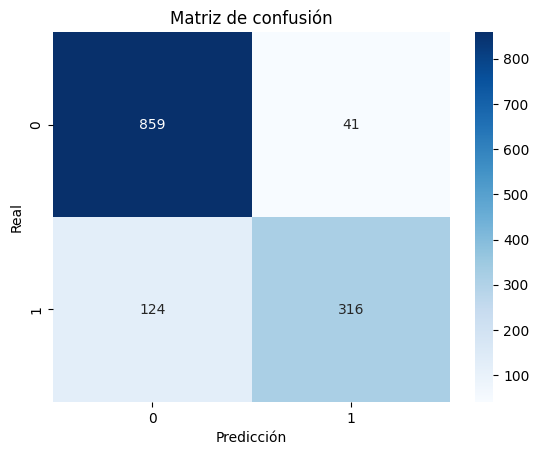

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes y_test y y_pred
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

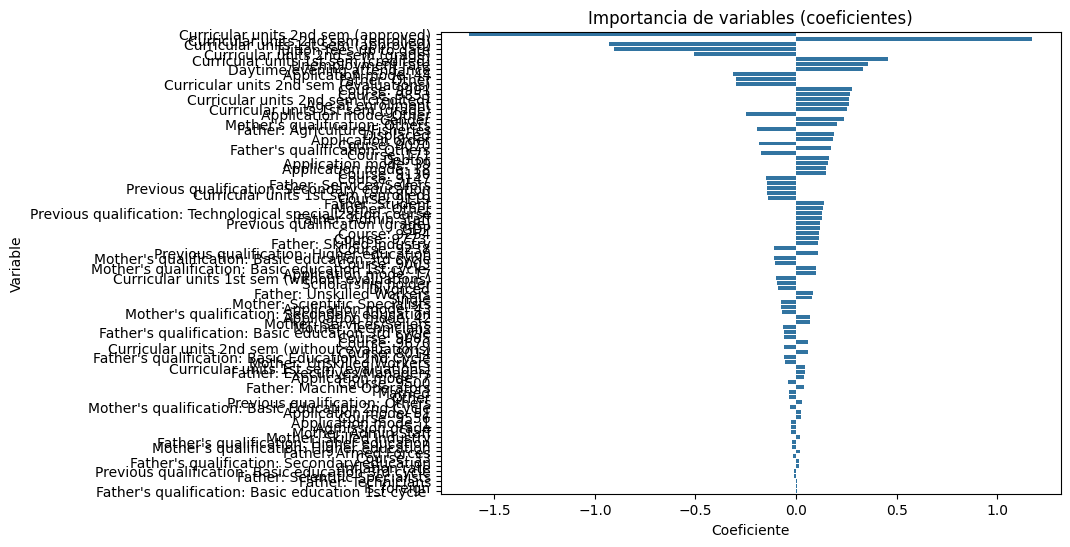

In [51]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df)
plt.title('Importancia de variables (coeficientes)')
plt.show()

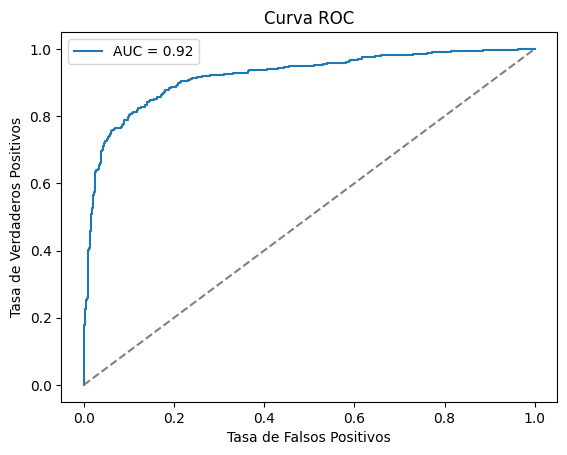

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()